<a href="https://colab.research.google.com/github/aodhanman/ProjectVision25/blob/main/GeneticAlgo2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from copy import deepcopy

In [2]:
def sphere_function(x):
  return sum(x**2)

In [3]:
def new_function(x):
  return (x[0]-1)*(x[0]-1) + (x[1]-2)*(x[1]-2) + (x[2]-3)*(x[2]-3)+(x[3]-4)*(x[3]-4)+(x[4]-5)*(x[4]-5)

In [4]:
class problemSM:
  def __init__(self):
    self.number_of_genes = 3
    self.min_gene_value = 0
    self.max_gene_value = 10
    self.cost_function = sphere_function

In [5]:
pmprob = problemSM()

In [6]:
class problem2:
  def __init__(self):
    self.number_of_genes = 5
    self.min_gene_value = -10
    self.max_gene_value = 10
    self.cost_function = new_function

In [7]:
class problem:
  def __init__(self):
    self.number_of_genes = 8
    self.min_gene_value = -10
    self.max_gene_value = 10
    self.cost_function = sphere_function

In [8]:
p = problem()

In [9]:
x=np.array([-1,3,-5,8,3,9,2,0])

In [10]:
p.cost_function(x)

np.int64(193)

In [43]:
sphere_function(x)

np.int64(193)

In [44]:
def choose_different_indices(max_value):
  index1 = np.random.randint(0,max_value)
  index2 = np.random.randint(0,max_value)
  if index1 == index2:
    return choose_different_indices(max_value)
  return index1, index2

In [13]:
np.random.uniform(0,10,7)

array([2.64298941, 1.51925756, 0.78649316, 5.70529456, 8.91376766,
       7.7262523 , 7.71522057])

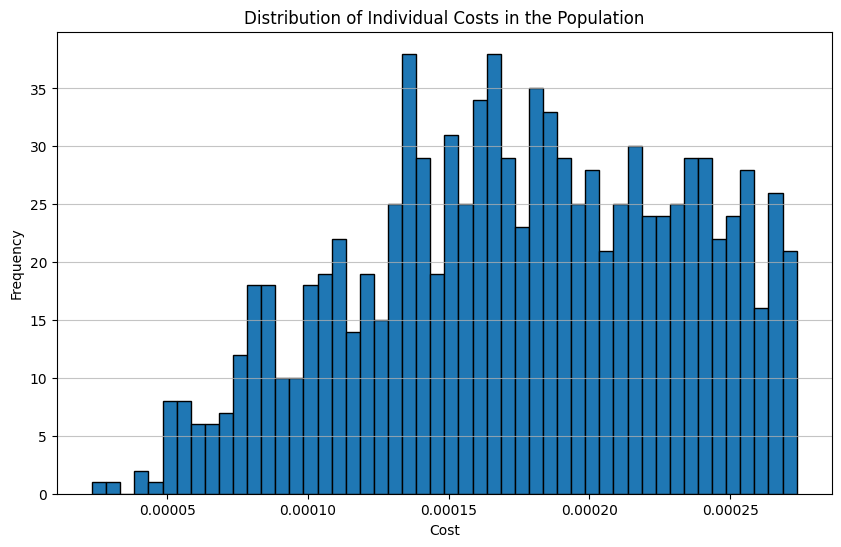

In [47]:
import matplotlib.pyplot as plt

# Extract costs from the population
costs = [ind.cost for ind in pop]

# Create a histogram of the costs
plt.figure(figsize=(10, 6))
plt.hist(costs, bins=50, edgecolor='black')
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.title("Distribution of Individual Costs in the Population")
plt.grid(axis='y', alpha=0.75)
plt.show()

In [14]:
def costLP(v):
  if v[0] + v[1] + v[2] <10:  #x+y+z <10
    return 10000000
  if 2*v[1] +4*v[2] <25:  # 2y+4z<25
    return 10000000
  return 3*v[0] +4*v[1]+5*v[2]  #3x+4y+5z

In [15]:
class problemLP:
  def __init__(self):
    self.number_of_genes = 3 # x,y,z
    self.min_gene_value = 0
    self.max_gene_value = 11
    self.cost_function = costLP

In [16]:
class individual:
  chromosone = None
  def __init__(self, prob):
    #Create a random individual.
    self.chromosone = np.random.uniform(prob.min_gene_value,prob.max_gene_value,prob.number_of_genes)
    self.cost = prob.cost_function(self.chromosone)

  def crossover(self,other_parent, epsilon):
    #random float in range -epsilon to 1 + epsilon (uniform)
    alpha = np.random.uniform(-epsilon, 1+epsilon)
    child1 = deepcopy(self)
    child2 = deepcopy(other_parent)
    child1.chromosone = alpha * self.chromosone + (1-alpha)*other_parent.chromosone
    child2.chromosone = (1-alpha) * self.chromosone + alpha*other_parent.chromosone

    return child1, child2

  def mutate(self,mutation_rate, range_change):
    for index in range(len(self.chromosone)):
      if (np.random.uniform() <mutation_rate):
        self.chromosone[index] += np.random.randn()*range_change


In [17]:
class parameters:
  def __init__(self):
    self.number_in_population = 1000
    self.number_of_generations = 100
    self.child_rate = 0.5
    self.crossover_explore = 0.1
    self.mutation_rate = 0.2
    self.range_of_gene_mutation = 0.3

In [50]:
def run_genetic(prob, params):
  #  read the problem
  cost_function = prob.cost_function

  #   read parameters
  number_in_population = params.number_in_population
  max_number_of_iterations = params.number_of_generations
  number_of_children = params.child_rate * number_in_population
  explore_rate_crossover = params.crossover_explore
  mutation_rate = params.mutation_rate
  range_of_mutation = params.range_of_gene_mutation

  #  Initialise the population
  best_solution = individual(prob)
  best_solution.cost = 999999

  population = []
  for i in range(number_in_population):
    new_individual = individual(prob)
    population.append(new_individual)
    if new_individual.cost < best_solution.cost:
      best_solution = deepcopy(new_individual)  # copy new_individual


  # loop over the generations (or till solution is found)
  for iteration in range(max_number_of_iterations):
    #generate children
    children = []
    while len(children) < number_of_children:
      # choose parents
      parent1_index, parent2_index = choose_different_indices(len(population))
      parent1 = population[parent1_index]
      parent2 = population[parent2_index]

      child1, child2 = parent1.crossover(parent2, explore_rate_crossover)

      #Mutate Children
      child1.mutate(mutation_rate, range_of_mutation)
      child2.mutate(mutation_rate, range_of_mutation)

      #  cost the children
      child1.cost = cost_function(child1.chromosone)
      child2.cost = cost_function(child2.chromosone)

      children.append(child1)
      children.append(child2)

    # add children to popuation
    population += children

    # sort and cull population

    population = sorted(population, key = lambda x: x.cost)
    population = population[:number_in_population]

    if population[0].cost < best_solution.cost:
      best_solution = deepcopy(population[0])



  return population, best_solution



show appropriate graphs for variables


SyntaxError: invalid syntax (ipython-input-2402004319.py, line 65)

In [53]:
pop, best_sol = run_genetic(prob, param)

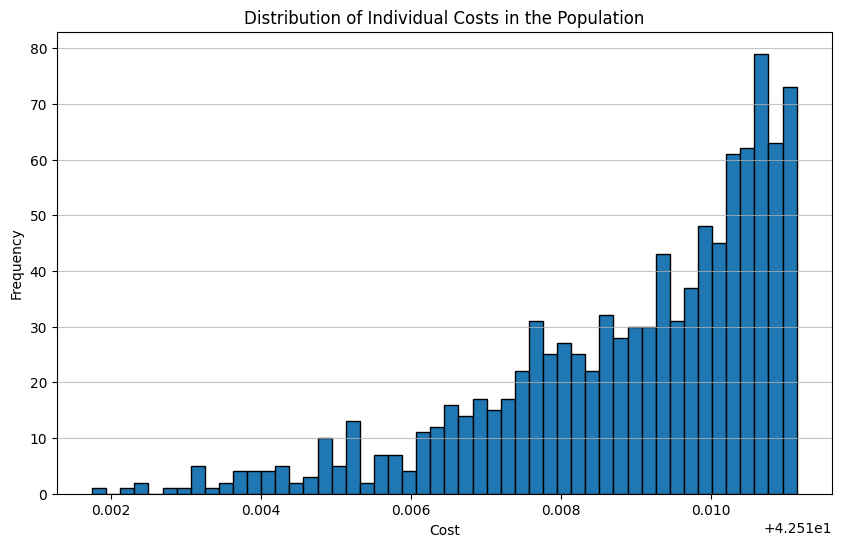

In [54]:
import matplotlib.pyplot as plt

# Extract costs from the population
costs = [ind.cost for ind in pop]

# Create a histogram of the costs
plt.figure(figsize=(10, 6))
plt.hist(costs, bins=50, edgecolor='black')
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.title("Distribution of Individual Costs in the Population")
plt.grid(axis='y', alpha=0.75)
plt.show()

In [19]:
prob = problemLP()

In [20]:
prob.number_of_genes

3

In [21]:
prob2 = problem2()

In [22]:
param = parameters()

In [23]:
param.number_in_population

1000

In [24]:
pop, best = run_genetic(prob,param)

In [25]:
best.chromosone

array([1.53875116, 4.4145523 , 4.04713127])

In [26]:
par2 = parameters()

In [27]:
par2.number_of_generations= 500

In [28]:
pop, best = run_genetic(pmprob,par2)


In [46]:
best.cost
display chart of costs

SyntaxError: invalid syntax (ipython-input-2810151274.py, line 2)

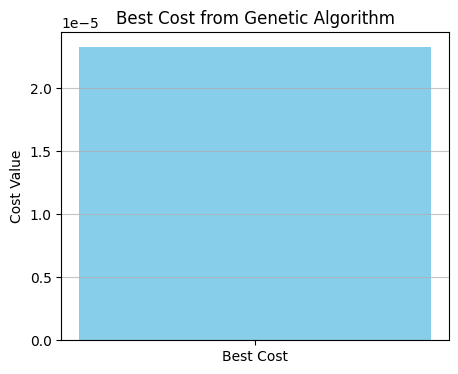

In [51]:
import matplotlib.pyplot as plt

# Assuming 'best_sol' is available from the last run of run_genetic
cost_value = best_sol.cost

plt.figure(figsize=(5, 4))
plt.bar(['Best Cost'], [cost_value], color='skyblue')
plt.ylabel('Cost Value')
plt.title('Best Cost from Genetic Algorithm')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [30]:
best.chromosone

array([5.88908872e-31, 4.88039252e-29, 4.82928105e-29])

In [31]:
best.chromosone

array([5.88908872e-31, 4.88039252e-29, 4.82928105e-29])

In [32]:
best.cost

np.float64(4.714365479664389e-57)

In [33]:
best.chromosone

array([5.88908872e-31, 4.88039252e-29, 4.82928105e-29])

In [34]:
best.cost

np.float64(4.714365479664389e-57)

In [35]:
para = parameters()

In [36]:
para

In [37]:
pop, best_sol = run_genetic(p,para)

In [38]:
pop[43]

In [39]:
pop[43]

In [41]:
i2.cost

NameError: name 'i2' is not defined

In [42]:
i1.chromosone

NameError: name 'i1' is not defined

In [ ]:
pop[1000]

In [ ]:
for i in range(200):
  i1, i2 = choose_different_indices(20)
  print("First" + str(i1) + "Second" + str(i2))

